In [1]:
import numpy as np
from matplotlib import pyplot as plt

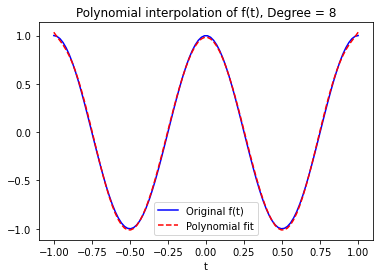

In [2]:
# Define function
f_opt = lambda t: np.cos(2*np.pi*t)


# Number of samples
M = 100

# Degree + 1
N = 9

# Choose sample location
tt = np.linspace(-1, 1, M)

# Compute "clean" function
ff = f_opt(tt)

# Form "observation matrix"
A = np.zeros((M,N))
for i in np.arange(N):
    A[:,i] = tt ** i
    

# Compute and plot least squares polynomial fit
xhat = np.linalg.pinv(A) @ ff
fhat = A @ xhat

plt.clf()
plt.plot(tt, ff, 'b')
plt.plot(tt, fhat, 'r--' )
plt.xlabel('t')
plt.title('Polynomial interpolation of f(t), Degree = {}'.format(N-1))
plt.legend(('Original f(t)','Polynomial fit'))


## Construct noisy observations
np.random.seed(2020) # Set random seed so results are repeatable

# Random gaussian noise
noise1 = np.random.randn(M)
noise1 = 5*noise1/np.linalg.norm(noise1)
y1 = ff + noise1

# Sparse gaussian noise
K = 15
Gamma = np.random.choice(M,K,0) 
noise2 = np.zeros(M)
noise2[Gamma] = np.random.randn(K)
noise2 = 5*noise2/np.linalg.norm(noise2)
y2 = ff + noise2


# Uniform noise
noise3 = np.random.rand(M)-0.5
noise3 = 5*noise3/np.linalg.norm(noise3)
y3 = ff + noise3

In [3]:
y1clean = np.linalg.pinv(A) @ y1 #really should be xhat1
ff1 = A @ y1clean
y2clean = np.linalg.pinv(A)@y2
ff2 = A @ y2clean
y3clean = np.linalg.pinv(A)@y3
ff3 = A @ y3clean

In [112]:
y1clean.shape

(9,)

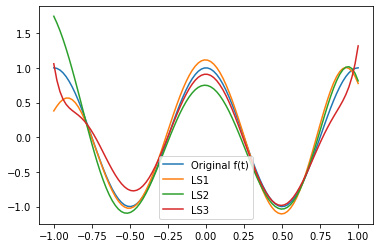

In [152]:
#plt.plot(tt,ff)
plt.plot(tt,ff)
plt.plot(tt,ff1)
plt.plot(tt,ff2)
plt.plot(tt,ff3)
plt.legend(('Original f(t)','LS1','LS2','LS3'))

In [178]:
maxit = 200
def subgraddesc (f): #fixed step gradient descent
    k = 0
    a = 1 #initial step size
    x = []
    x.append(np.ones(9))
    d = []
    z = []
    z.append(np.zeros(100))
    #print(x[0].shape)
    z[k] = np.sign(A@x[k]-f)
    d.append(A.T@z[k])
    while (k<4 or np.linalg.norm(x[k]-x[k-2],2)>1e-10) and k <= maxit:
        while np.linalg.norm(A@x[k],1)-np.linalg.norm(A@(x[k]+a*d[k]),1) < -.2*a*np.inner(d[k],d[k]):
            rho = .6
            a = rho * a
        z.append(np.sign(A@x[k]-f))
        d.append(A.T@z[k])#append new subgradient
        x.append(x[k] - a * d[k])
        k = k + 1
    print("Number of iterations: ", k+1)
    return x[k]


Number of iterations:  5


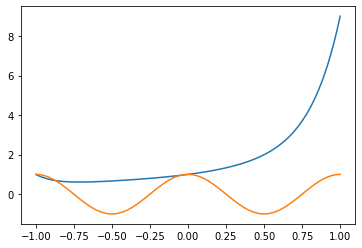

In [180]:
xx = subgraddesc(ff)
#print(xx)
plt.plot(tt,A@xx)
plt.plot(tt,ff)

In [115]:
(A@np.ones(9)).shape

(100,)